In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
raw_data = pd.read_csv('uci-secom.csv')

In [2]:
raw_data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## null값 median으로 변경

In [3]:
raw_data.replace(np.nan, raw_data.median(), inplace=True)

In [4]:
# again, checking if there is any NULL values left
raw_data.isnull().any().any()

False

## 같은 값만 있는 열 제거

In [5]:
unique_columns = []
for i in raw_data.columns:
    tmp = raw_data[i].unique() # data[i].unique()
    if len(tmp) == 1:
        unique_columns.append(i)

In [6]:
len(unique_columns)

116

In [7]:
raw_data.drop(unique_columns, axis='columns', inplace=True)

In [13]:
data = raw_data

## Time 변수 제거

In [15]:
data.drop('Time', axis='columns', inplace=True)

In [16]:
data

,0,1,2,3,4,6,7,8,9,10,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,72.2889,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,82.2467,0.1248,1.3424,-0.0045,-0.0057,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,98.4689,0.1205,1.4333,-0.0061,-0.0093,...,72.2889,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,99.4122,0.1208,1.4616,-0.0013,0.0004,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,98.7978,0.1213,1.4622,-0.0072,0.0032,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


## X, y 분리

In [17]:
X = data.loc[:,'0':'589'].copy() # 컬럼명으로 search 
y = data.loc[:,'Pass/Fail'].copy()

## Train, test split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

# 변수별 영향력 도출

- 데이터 표준화 (MinMax Scaling or Z-score)
- 회귀모형의 회귀계수 (Logistic Regression)
- 의사결정모형의 Feature Importance
- RFE 방식

## 데이터 표준화

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracy score 0.9299363057324841
confusion_matrix [[290   3]
 [ 19   2]]
precision_score 0.09860479223536549
recall_score 0.09523809523809523
f1_score 0.15384615384615385


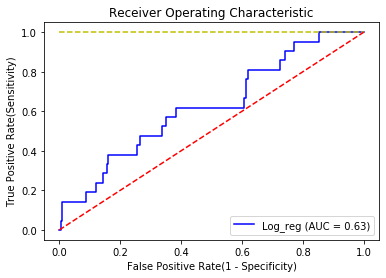

In [29]:
## 성능평가
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

## 로지스틱 회귀를 이용한 변수별 가중치 도출 

In [31]:
# 로지스틱 회귀를 이용한 coefficient(계수) 도출 = 변수별 가중치 도출 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

log_rg = LogisticRegression(random_state=13,solver='liblinear').fit(X_train_scaled, y_train)
cross_val_score(log_rg, X_train_scaled, y_train, cv=5)
log_rg.score(X_test_scaled, y_test)
print(classification_report(y_test, log_rg.predict(X_test_scaled)))

feature_importance_lr = pd.DataFrame(zip(X.columns.values, log_rg.coef_.ravel()))
feature_importance_lr.columns = ['feature', 'coef']
feature_importance_lr.sort_values("coef", ascending=False, inplace=True)

              precision    recall  f1-score   support

          -1       0.94      0.99      0.96       293
           1       0.40      0.10      0.15        21

    accuracy                           0.93       314
   macro avg       0.67      0.54      0.56       314
weighted avg       0.90      0.93      0.91       314



In [32]:
feature_importance_lr

,feature,coef
122,129,2.039516
54,59,0.923710
73,79,0.892637
143,152,0.814033
293,348,0.807563
...,...,...
29,31,-0.847196
26,28,-0.858980
446,562,-0.954142
125,132,-1.169451


## 랜덤포레스트를 이용한 영향력 도출

In [33]:
# 랜덤포레스트를 이용한 영향력 도출
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10).fit(X_train_scaled, y_train)
cross_val_score(rf, X_train_scaled, y_train, cv=3)
rf.score(X_test_scaled, y_test)
print(classification_report(y_test, rf.predict(X_test_scaled)))

feature_importance_rf = pd.DataFrame(zip(X.columns.values, rf.feature_importances_))
feature_importance_rf.columns = ['feature', 'importance']
feature_importance_rf.sort_values("importance", ascending=False, inplace=True)

              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       293
           1       1.00      0.05      0.09        21

    accuracy                           0.94       314
   macro avg       0.97      0.52      0.53       314
weighted avg       0.94      0.94      0.91       314



In [34]:
feature_importance_rf

,feature,importance
161,170,0.020078
423,539,0.018600
242,287,0.013288
54,59,0.012687
456,572,0.012209
...,...,...
87,93,0.000000
343,423,0.000000
346,426,0.000000
347,427,0.000000


# Wrapper method

## RFE을 이용한 변수별 중요도 도출

### n_features_to_select=200

In [47]:
# 반복적 변수 제거 방식을 이용한 변수별 중요도 도출
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=5, random_state=42), n_features_to_select = 200)
select.fit(X_train_scaled, y_train)

feature_importance_rfe = pd.DataFrame(zip(X.columns.values, select.get_support()))
feature_importance_rfe.columns = ['feature', 'importance']
feature_importance_rfe.sort_values("importance", ascending=False, inplace=True)

In [48]:
feature_importance_rfe.head(10)

,feature,importance
143,152,True
162,171,True
136,144,True
335,413,True
138,146,True
139,147,True
140,148,True
141,150,True
404,495,True
144,153,True


In [50]:
## 성능평가
from sklearn.linear_model import LogisticRegression

X_train_scaled_rfe = select.transform(X_train_scaled)
X_test_scaled_rfe = select.transform(X_test_scaled)

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled_rfe, y_train)

LogisticRegression(random_state=13, solver='liblinear')

accuracy score 0.9299363057324841
confusion_matrix [[291   2]
 [ 20   1]]
precision_score 0.07956728338893944
recall_score 0.047619047619047616
f1_score 0.08333333333333333


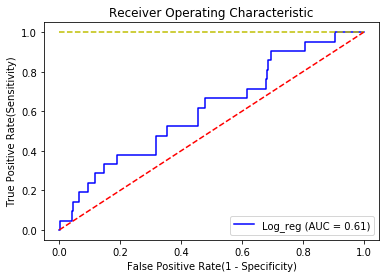

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled_rfe)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled_rfe))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled_rfe))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

- 0.63 >> 0.61 떨어짐 (n_features_to_select = 200)

### n_features_to_select=300

In [53]:
# 반복적 변수 제거 방식을 이용한 변수별 중요도 도출 (n_features_to_select=300)
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=5, random_state=42), n_features_to_select = 300)
select.fit(X_train_scaled, y_train)

feature_importance_rfe = pd.DataFrame(zip(X.columns.values, select.get_support()))
feature_importance_rfe.columns = ['feature', 'importance']
feature_importance_rfe.sort_values("importance", ascending=False, inplace=True)

In [54]:
## 성능평가
from sklearn.linear_model import LogisticRegression

X_train_scaled_rfe = select.transform(X_train_scaled)
X_test_scaled_rfe = select.transform(X_test_scaled)

log_reg = LogisticRegression(random_state=13,solver='liblinear')
log_reg.fit(X_train_scaled_rfe, y_train)

LogisticRegression(random_state=13, solver='liblinear')

accuracy score 0.9267515923566879
confusion_matrix [[290   3]
 [ 20   1]]
precision_score 0.07559902942068547
recall_score 0.047619047619047616
f1_score 0.08


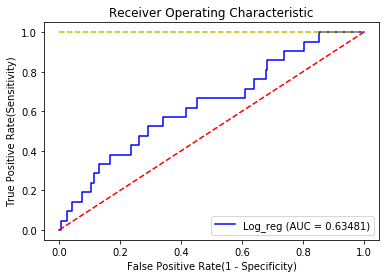

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test_scaled_rfe)
print('accuracy score', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('confusion_matrix', cm)
print('precision_score', average_precision_score(y_test, y_pred))
print('recall_score', recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# decision_function: 불확실성을 추정 = 확률로 표현 
roc_auc  = roc_auc_score(y_test, log_reg.decision_function(X_test_scaled_rfe))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, log_reg.decision_function(X_test_scaled_rfe))

plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate, true_positive_rate, 'b', label='Log_reg (AUC = %0.5f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

- 0.63 >> 0.63 같음 (n_features_to_select = 300)
- n_features_to_select이 300이상일 때도 해보았지만 성능이 오히려 더 떨어짐 

In [ ]:
 Permutation Feature Importance